In [1]:
"""
    File name: Plot_Utils.ipynb
    Author: Amin Abyaneh
    Email: aminabyaneh@gmail.com
    Date created: 25/04/2021
    Python Version: 3.8
    Description: Extracting the execution data by plots.
"""

# ========================================================================
# Copyright 2021, The CFL Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# You may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ========================================================================


import os, sys
import pickle
from typing import List

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from logging_settings import logger

cm = 0.393701

## Required Methods

In [1]:
def set_plot_styles(title: str, x_label: str, y_label: str, save_file_name: str,
                    legend_location: str = 'upper right', legend_labels: str = None,
                    title_size: int = 20, labels_size: int = 15, ticks_size: int = 15,
                    legend_size: int = 10, xticks_rotation: int = 45):
    """
    Set the plot styles ranging from title, labels and legends all the way to

    Args:
        title (str): The plot title.
        x_label (str): Label of the x axis.
        y_label (str): Label of the y axis.

        save_file_name (str): Where and in what name do you like to save the figure.
        legend_location (str): Optimize the legends locations. Defaults to 'upper right'.
        legend_labels (str): If label is available, change this from None to the label itself.
        Defaults to None.

        title_size (int): Size of the figures title. Defaults to 20.
        labels_size (int): Size of the labels. Defaults to 15.
        ticks_size (int): Ticks size. Defaults to 15.
        legend_size (int): Size of legends. Defaults to 10.
        xticks_rotation (int): The rotation of X-axis labels. Defaults to 45.
    """

    if legend_labels is None:
        plt.legend(ncol=1, loc=legend_location, fontsize=legend_size)
    else:
        plt.legend(labels=legend_labels, loc=legend_location, fontsize=legend_size)

    plt.title(title, fontsize=title_size)
    plt.xlabel(x_label, fontsize=labels_size)
    plt.ylabel(y_label, fontsize=labels_size)

    plt.xticks(fontsize=ticks_size, rotation=xticks_rotation)
    plt.yticks(fontsize=ticks_size)

    plt.savefig(save_file_name, bbox_inches='tight')
    plt.show()

## Structured Graphs Experiments

In [4]:
def plot_enco_3x1_results(folder_names: List[str], experiment_id: int, labels: List[str],
                          colors: List[str], title: str = 'default', fig_name: str = 'default.png',
                          metric: str = "SHD"):
    plt.figure(figsize=(5 * cm, 5 * cm), dpi=500)
    seaborn.set_style("darkgrid")

    for index, folder_name in enumerate(folder_names):
        dir = os.path.join(os.pardir, 'data', folder_name, f'results_{experiment_id}.pickle')

        with open(dir, 'rb') as handle:
            stored_results_dict = pickle.load(handle)

        rounds = [round_id for round_id in range(len(stored_results_dict[0]))]
        metrics = np.zeros(len(rounds))
        for client_id in stored_results_dict:
            if client_id == 'priors':
                break

            metrics += np.asarray([results_dict[metric] for results_dict in stored_results_dict[client_id]])
            logger.info(f'Experiment {experiment_id} client {client_id} metrics: {metrics}')

        num_clients = len(stored_results_dict.items()) - 1
        plt.plot(rounds, np.asarray(metrics)/num_clients, label=labels[index], color=colors[index], linewidth=0.4)
        plt.scatter(rounds, np.asarray(metrics)/num_clients, c=colors[index], s=3)

    plt.ylim([-5, 80])
    plt.xticks(rounds)

    set_plot_styles(title=title, x_label='Round Id', title_size=5, labels_size=3.5,
                    ticks_size=3.5, legend_size=2.5,
                    y_label=metric, save_file_name=fig_name)


def plot_enco_3x1_results_prior(folder_names: List[str], experiment_id: int, labels: List[str],
                                colors: List[str], title: str = 'default', fig_name: str = 'default.png',
                                metric: str = "SHD"):
 
    plt.figure(figsize=(5 * cm, 5 * cm), dpi=500)
    seaborn.set_style("darkgrid")

    for index, folder_name in enumerate(folder_names):
        dir = os.path.join(os.pardir, 'data', folder_name, f'results_{experiment_id}.pickle')

        with open(dir, 'rb') as handle:
            stored_results_dict = pickle.load(handle)

        client_id = 'priors'
        rounds = [round_id for round_id in range(len(stored_results_dict[0]))]
        metrics = [results_dict[metric] for results_dict in stored_results_dict[client_id]]

        logger.info(f'Experiment {experiment_id} client {client_id} metrics: {metrics}')

        plt.plot(rounds, metrics, label=labels[index], color=colors[index], linewidth=0.4)
        plt.scatter(rounds, metrics, c=colors[index], s=3)

    plt.ylim([-5, 100])
    plt.xticks(rounds)

    set_plot_styles(title=title, x_label='Round Id', title_size=5, labels_size=3.5,
                    ticks_size=3.5, legend_size=2.5,
                    y_label=metric, save_file_name=fig_name)
    

In [ ]:
exp_num = 12
graph_type = "chain"
num_vars = 50
for exp_id in range(exp_num):
    fig_name = f'{graph_type}_{num_vars}_3x1_{exp_id}.png'
    plot_enco_3x1_results([f'Graph1-{graph_type}-{num_vars}', f'Graph1-{graph_type}-{num_vars}-all', f'Graph10-{graph_type}-{num_vars}'],
                                exp_id,
                                ['1-client (10%)', '1-client (100%)', '10-clients (10%) average'],
                                ['navy', 'brown', 'purple'],
                                f'Evaluation of {graph_type}-{num_vars} setups', fig_name)

## Random Graph Experiments Set 0


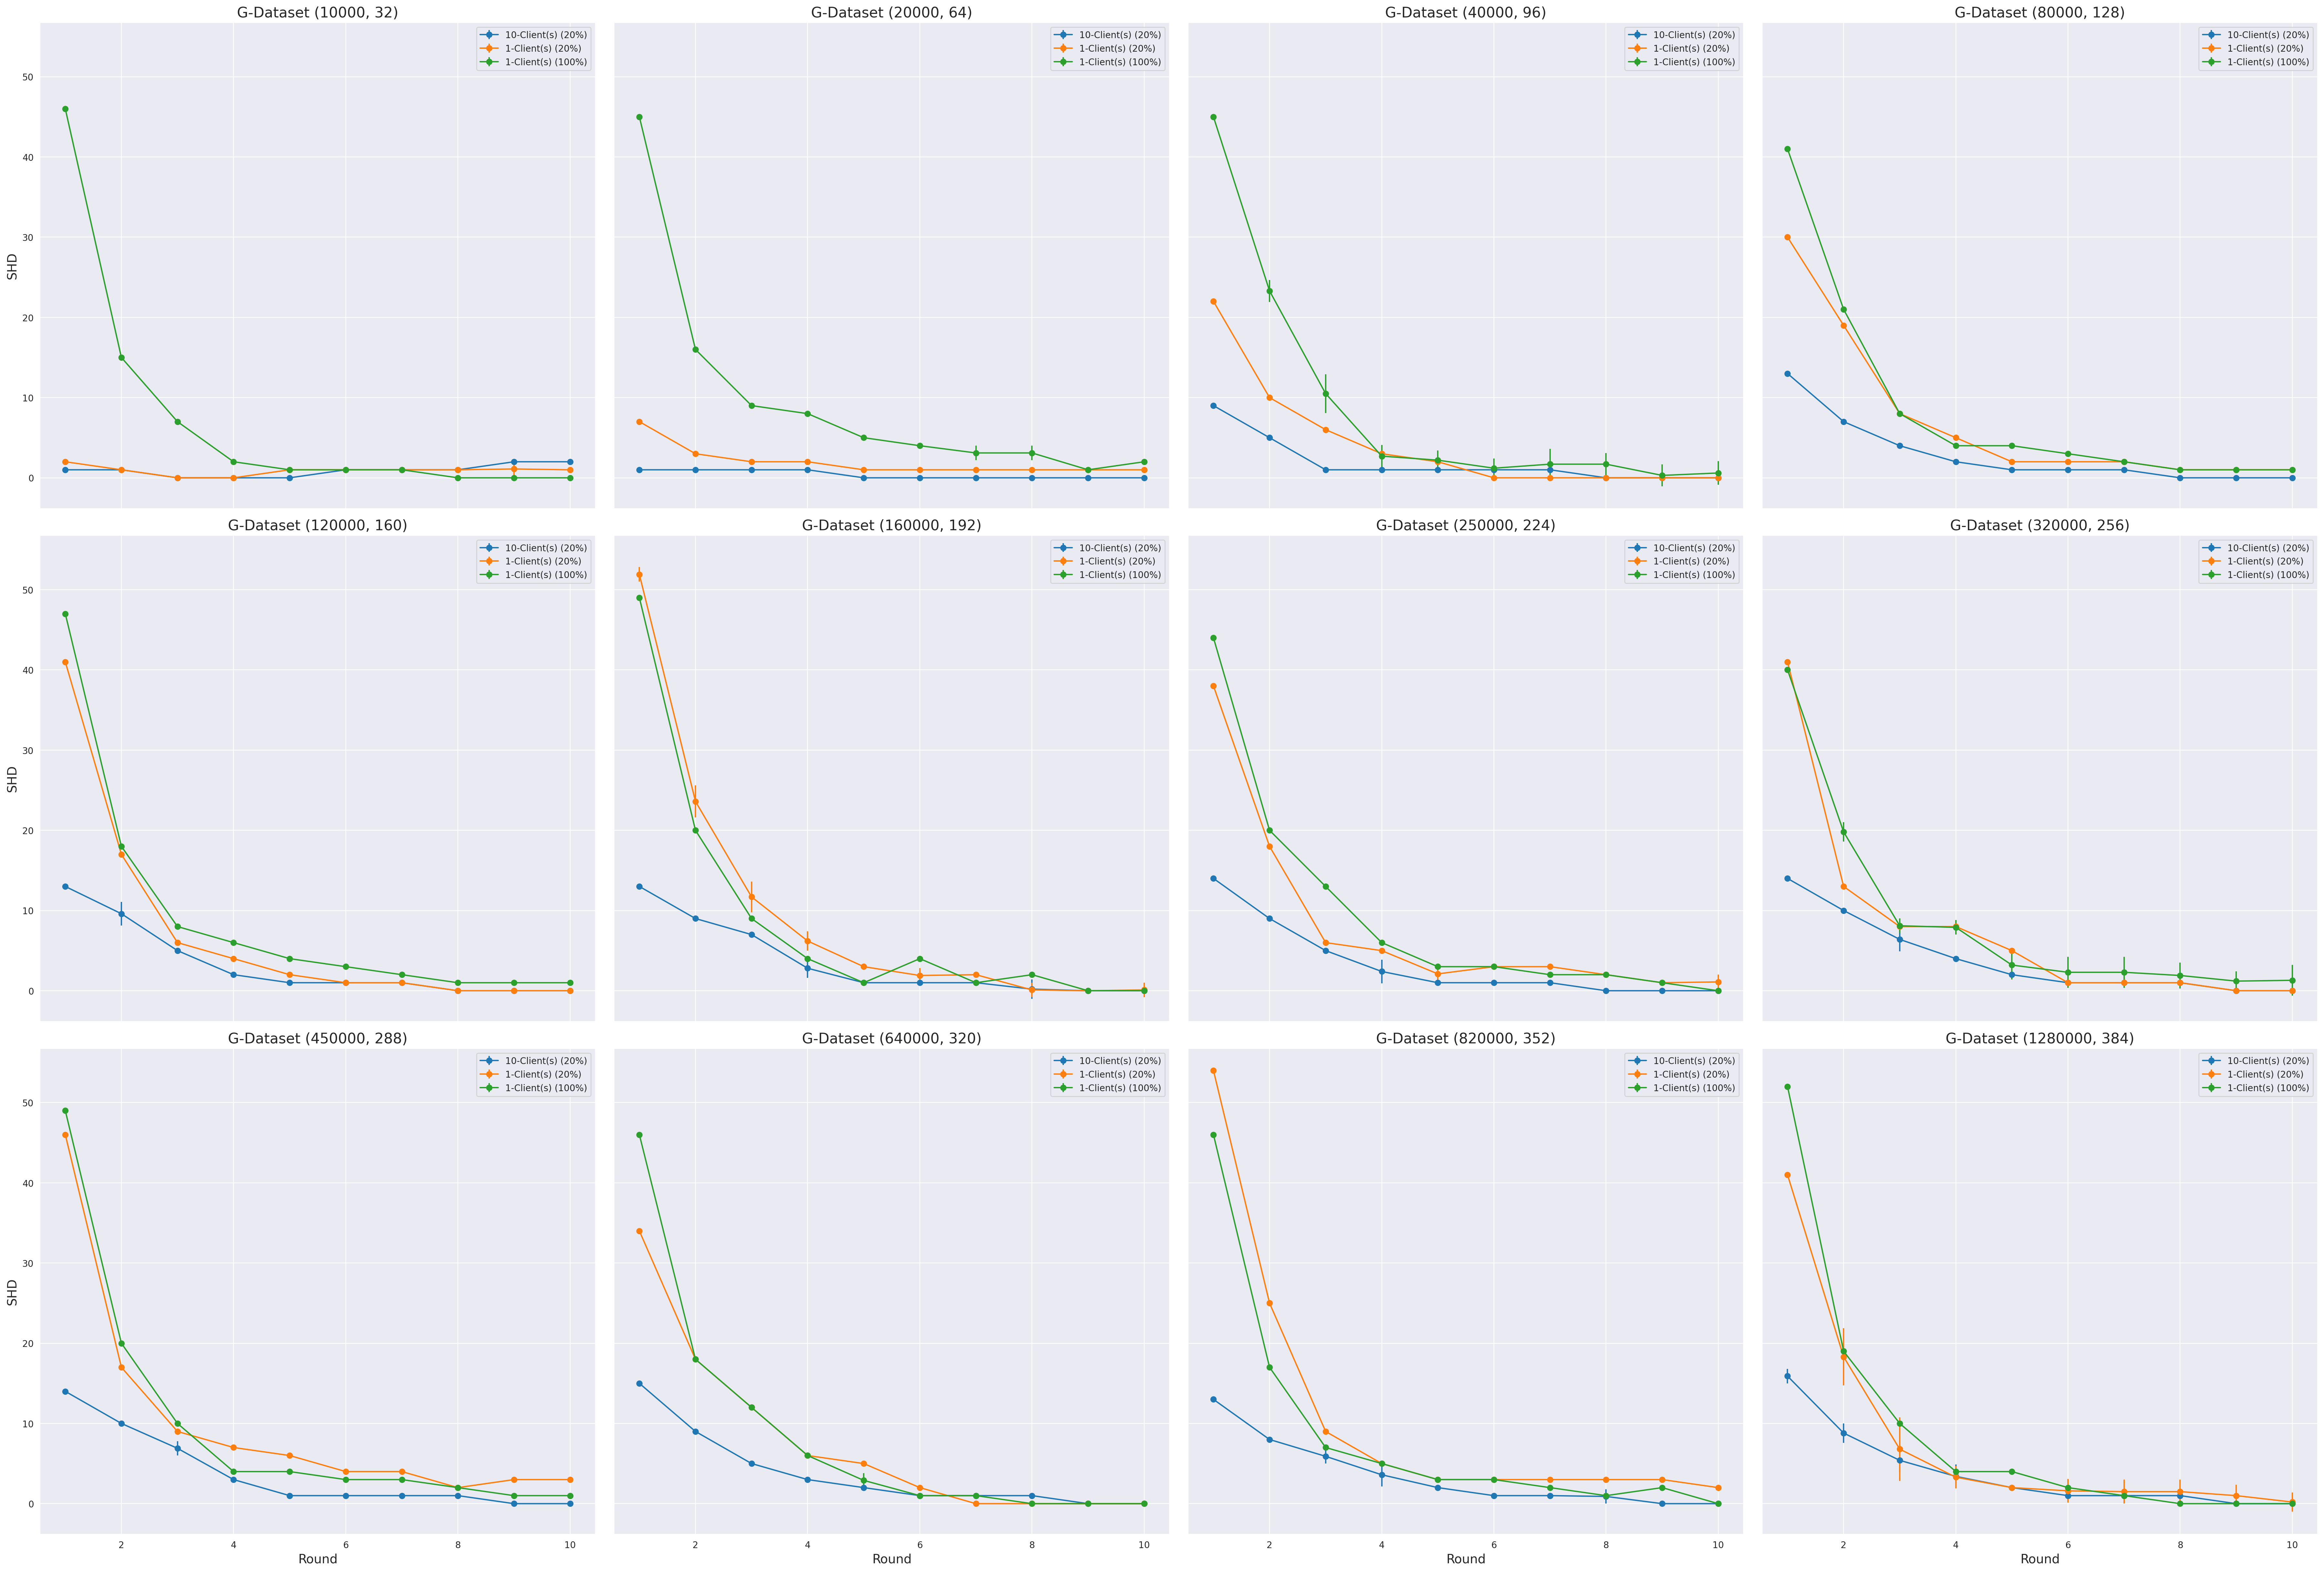

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
"""
We get a folder structure like this after running the experiments.

Graph10-random0.02-50/
"""

# Experiments
num_experiments = 12
repeat_count = 10
num_of_rounds = 10

# Graphs
graph_type = "random"
num_vars = 50
edge_probs = [0.02, 0.05, 0.1, 0.15, 0.2, 0.3]
num_clients_list = [10, 1, '1x']

# Dataset size
num_clients = 10
obs_data_sizes = [1000 * num_clients, 2000 * num_clients, 4000 * num_clients,
                  8000 * num_clients, 12000 * num_clients, 16000 * num_clients,
                  25000 * num_clients, 32000 * num_clients, 45000 * num_clients,
                  64000 * num_clients, 82000 * num_clients, 128000 * num_clients]

int_data_sizes = [32 * p for p in range(1, 12 + 1)]

# Miscellaneous
plot_metric = "SHD"
std_exageration = 3
parent_folder_name = "rnd_graphs_0"


def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

# A list for rounds
rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

# for edge_prob in edge_probs:
#     # One plot per edge probability consisting of all experiments for three different setup

n_row = 3
n_col = 4

sns.set_style('darkgrid')
fig, axs = plt.subplots(n_row, n_col, figsize=(36, 24), dpi=200, sharex='all', sharey='all')
fig.tight_layout(h_pad=2, w_pad=0.5)

for edge_prob in edge_probs:
    for experiment_id in range(num_experiments):

        # For each exp_id go over all setups
        ax_row = experiment_id // 4
        ax_col = experiment_id % 4
        axs[ax_row, ax_col].set_title(f'G-Dataset ({obs_data_sizes[experiment_id]}, {int_data_sizes[experiment_id]})', fontsize=16)

        for num_clients in num_clients_list:
            folder_name = f'Graph{num_clients}-{graph_type}{edge_prob}-{num_vars}'

            metrics = list()
            for rep_idx in range(repeat_count):
                # Mean on all the repititions

                data_file_name = f'results_{experiment_id}_{rep_idx}.pickle'
                load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)

                with open(load_dir, 'rb') as handle:
                    results_dict = pickle.load(handle)

                metrics.append(retrieve_client_info(results_dict))

            metrics_avg = np.mean(np.asarray(metrics), axis=0)
            metrics_std = np.std(np.asarray(metrics), axis=0)

            lab = f'{num_clients}-Client(s) (20%)' if isinstance(num_clients, int) else f'1-Client(s) (100%)'


            axs[ax_row, ax_col].errorbar(rounds, metrics_avg, std_exageration * metrics_std, label=lab,
                                         linestyle='solid', marker='o')
            axs[ax_row, ax_col].legend(loc='upper right')

    for r in range(n_row):
        axs[r, 0].set_ylabel(plot_metric, fontsize=14)


    for c in range(n_col):
        axs[n_row - 1, c].set_xlabel('Round', fontsize=14)


    plt.savefig(f'dataset-sweep-high-ep{edge_prob}-v{num_vars}-{graph_type}.png', bbox_inches='tight')
    plt.show()


### Random Graphs Experiments Set 1


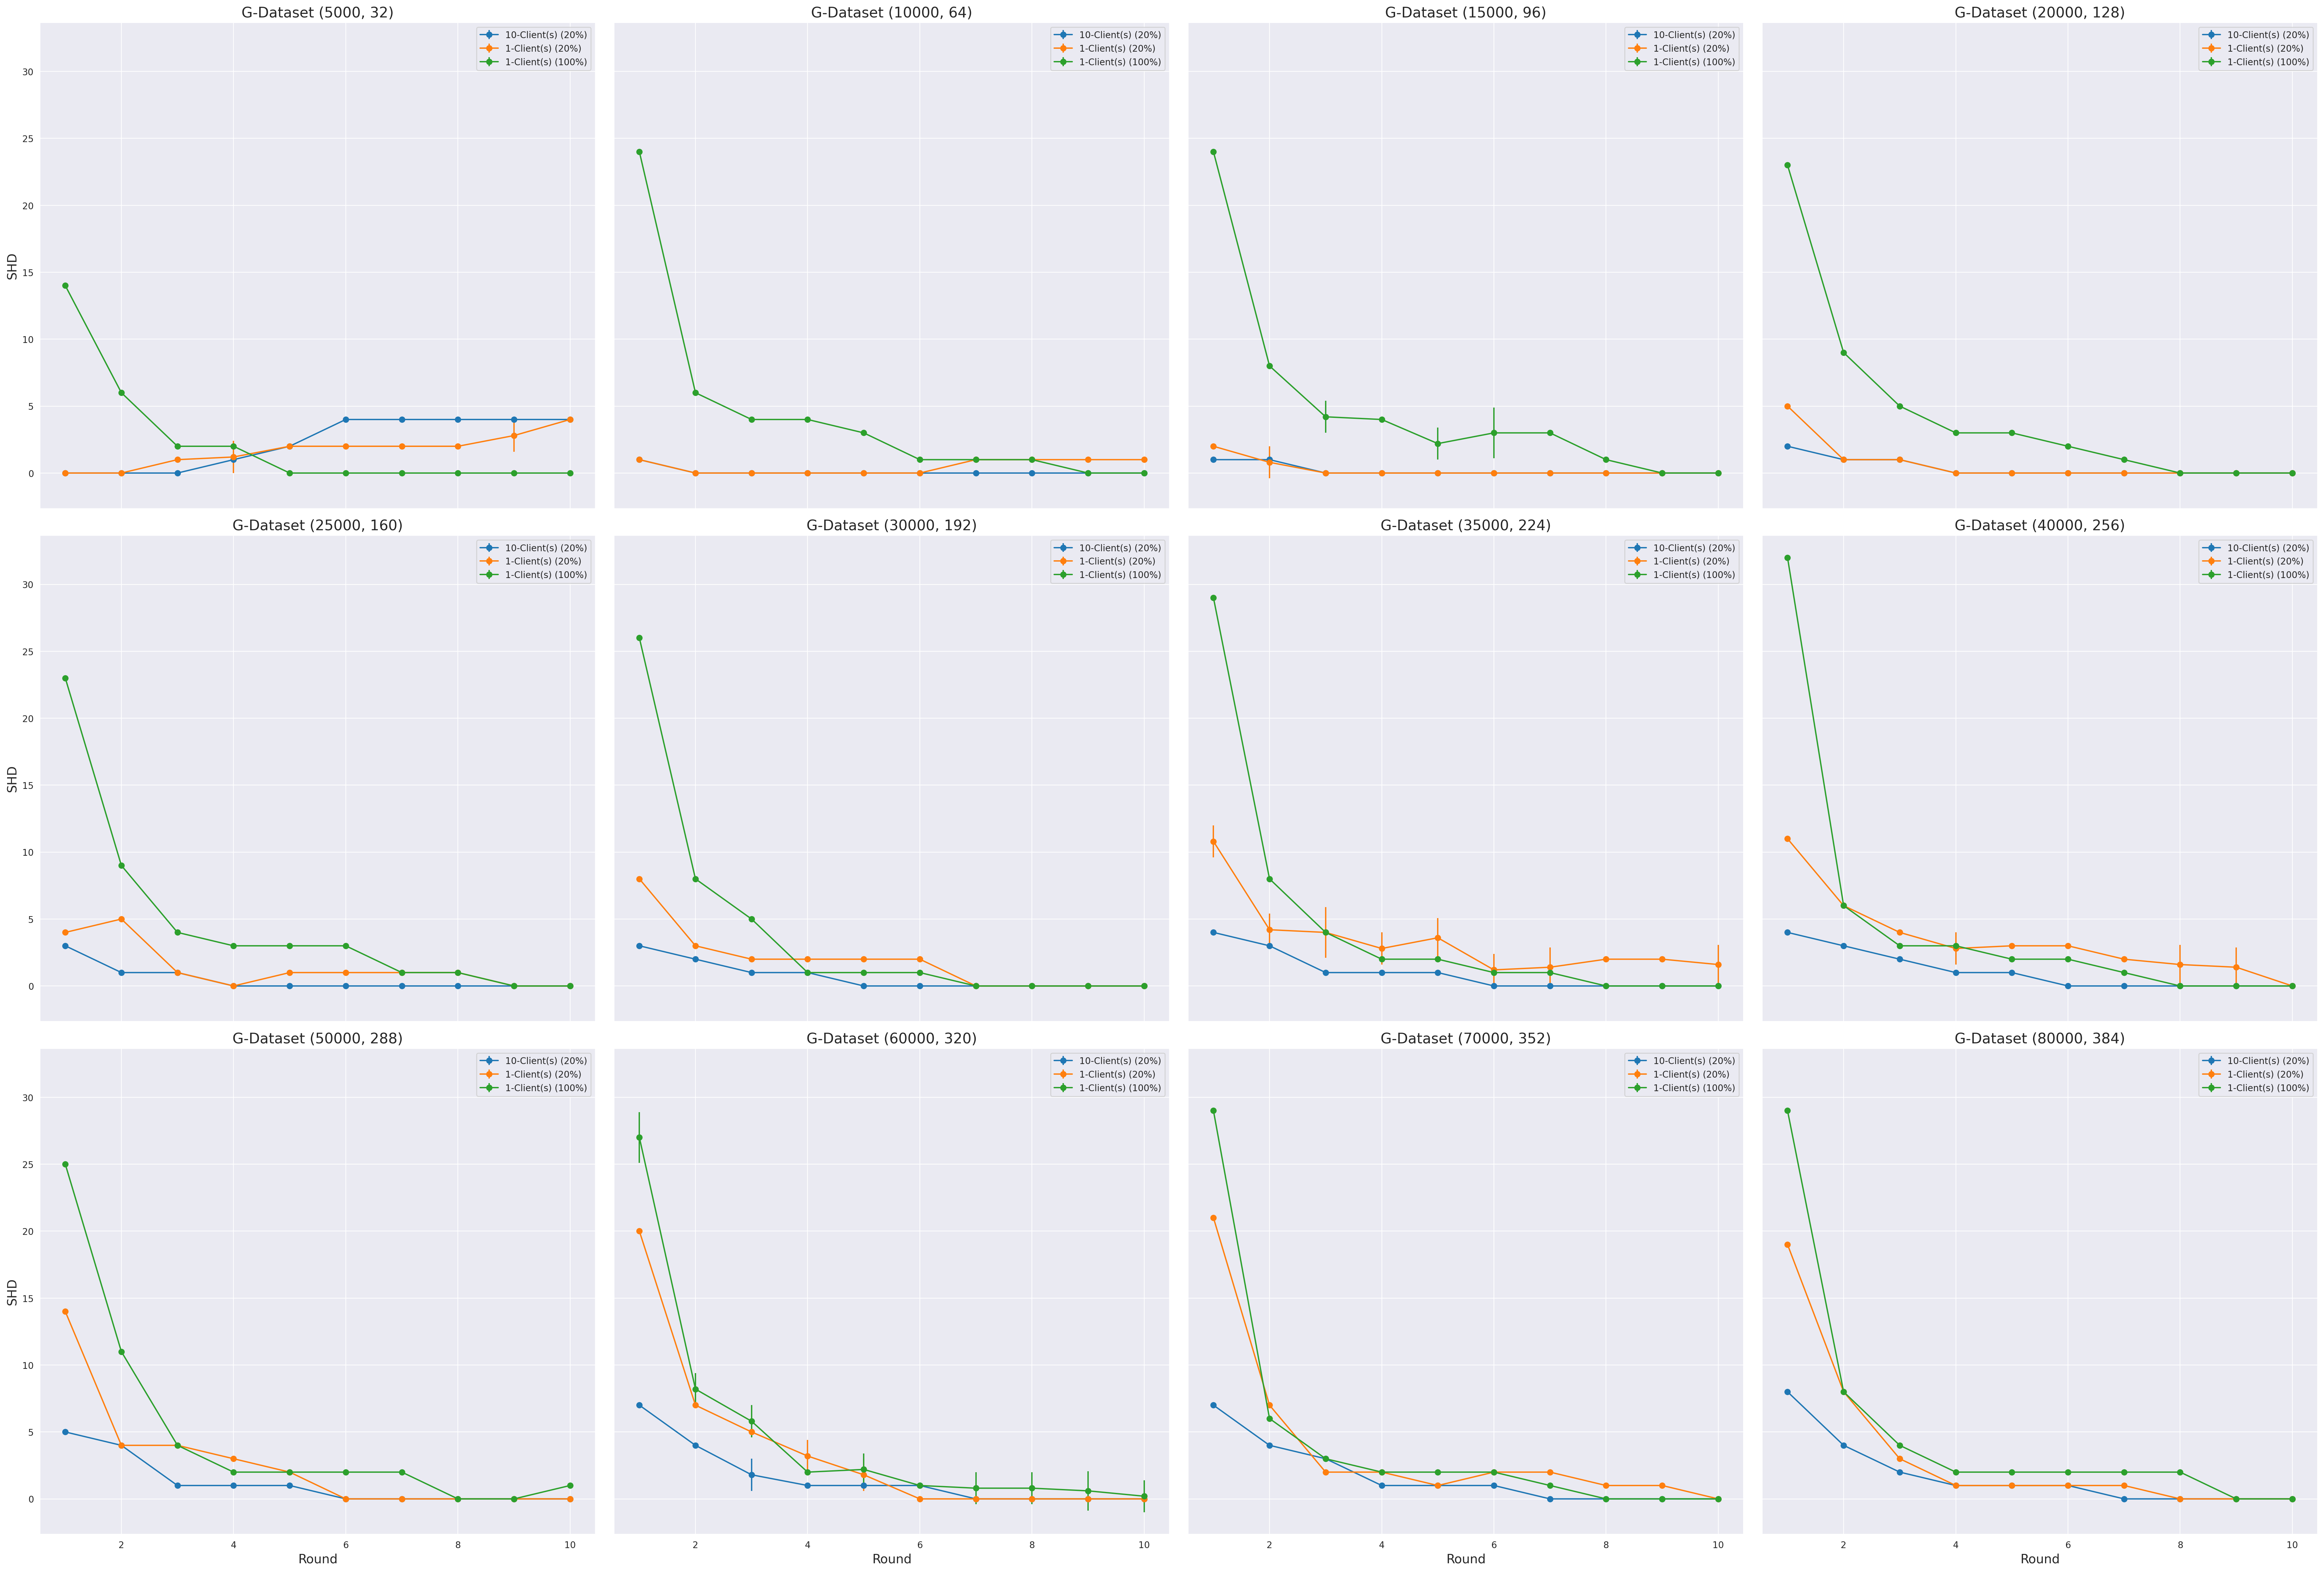

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
"""
We get a folder structure like this after running the experiments.

Graph10-random0.02-50/
"""

# Experiments
num_experiments = 12
repeat_count = 5
num_of_rounds = 10

# Graphs
graph_type = "random"
num_vars = 50
edge_probs = [0.01, 0.02, 0.04, 0.16, 0.32, 0.64, 0.8]
num_clients_list = [10, 1, '1x']

# Dataset size
num_clients = 10
obs_data_sizes = [500 * num_clients, 1000 * num_clients, 1500 * num_clients, 
                  2000 * num_clients, 2500 * num_clients, 3000 * num_clients,
                  3500 * num_clients, 4000 * num_clients, 5000 * num_clients,
                  6000 * num_clients, 7000 * num_clients, 8000 * num_clients]

int_data_sizes = [32 * p for p in range(1, 12 + 1)]

# Miscellaneous
plot_metric = "SHD"
std_exageration = 3
parent_folder_name = "rnd_graphs_1"


def retrieve_client_info(stored_results_dict, metric=plot_metric) -> np.ndarray:
    return np.asarray([client_dict[metric] for client_dict in stored_results_dict['priors']])

# A list for rounds
rounds = np.arange(start=1, stop=num_of_rounds + 1, step=1)

n_row = 3
n_col = 4

sns.set_style('darkgrid')
fig, axs = plt.subplots(n_row, n_col, figsize=(36, 24), dpi=200, sharex='all', sharey='all')
fig.tight_layout(h_pad=2, w_pad=0.5)

for edge_prob in edge_probs:

    for experiment_id in range(num_experiments):

        # For each exp_id go over all setups
        ax_row = experiment_id // 4
        ax_col = experiment_id % 4
        axs[ax_row, ax_col].set_title(f'G-Dataset ({obs_data_sizes[experiment_id]}, {int_data_sizes[experiment_id]})', fontsize=16)

        for num_clients in num_clients_list:
            folder_name = f'Graph{num_clients}-{graph_type}{edge_prob}-{num_vars}'

            metrics = list()
            for rep_idx in range(repeat_count):
                # Mean on all the repititions

                data_file_name = f'results_{experiment_id}_{rep_idx}.pickle'
                load_dir = os.path.join(os.pardir, 'data', parent_folder_name, folder_name, data_file_name)

                with open(load_dir, 'rb') as handle:
                    results_dict = pickle.load(handle)

                metrics.append(retrieve_client_info(results_dict))

            metrics_avg = np.mean(np.asarray(metrics), axis=0)
            metrics_std = np.std(np.asarray(metrics), axis=0)

            lab = f'{num_clients}-Client(s) (20%)' if isinstance(num_clients, int) else f'1-Client(s) (100%)'


            axs[ax_row, ax_col].errorbar(rounds, metrics_avg, std_exageration * metrics_std, label=lab,
                                         linestyle='solid', marker='o')
            axs[ax_row, ax_col].legend(loc='upper right')

    for r in range(n_row):
        axs[r, 0].set_ylabel(plot_metric, fontsize=14)


    for c in range(n_col):
        axs[n_row - 1, c].set_xlabel('Round', fontsize=14)


    plt.savefig(f'dataset-sweep-low-ep{edge_prob}-v{num_vars}-{graph_type}.png', bbox_inches='tight')
    plt.show()
